In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1],
    [2, 1],
    [1, 2],
    [2, 2],
    [3, 2],
    [6, 6],
    [7, 6],
    [8, 6],
    [6, 7],
    [7, 7],
    [8, 7],
    [9, 7],
    [7, 8],
    [8, 8],
    [9, 8],
    [8, 9],
    [9, 9],
])

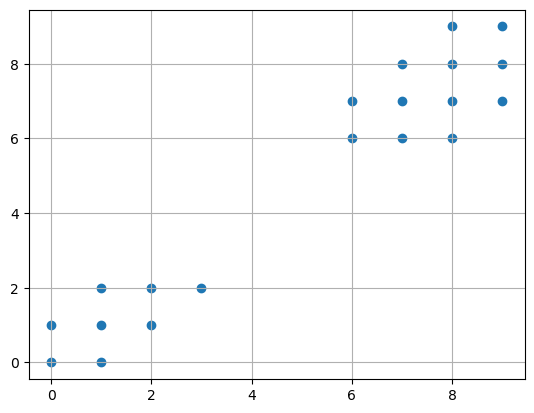

In [5]:
plt.scatter(X[:, 0], X[:, -1])
plt.grid()

In [ ]:
from sklearn.cluster import DBSCAN

In [13]:
dbscan = DBSCAN(eps=3, min_samples=2)
dbscan.fit(X)

DBSCAN(eps=3, min_samples=2)

In [14]:
dblabels = dbscan.labels_
dblabels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

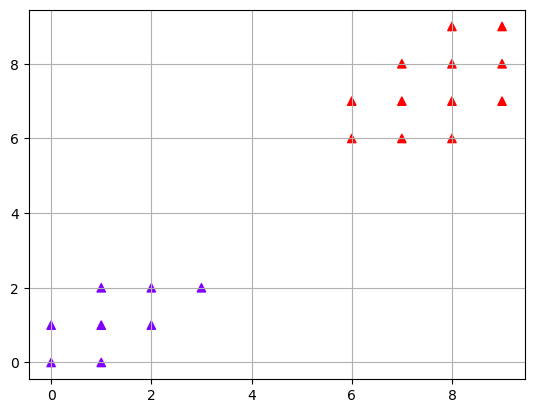

In [15]:
plt.scatter(X[:, 0], X[:, -1], c=dblabels, marker="^", cmap="rainbow")
plt.grid()

In [16]:
from sklearn import datasets

In [17]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

In [18]:
noisy_circles

(array([[ 0.87436488,  0.43124713],
        [-0.30550093, -1.06713196],
        [ 0.73503322, -0.72340441],
        ...,
        [-0.00417716,  0.48523187],
        [-0.84129121, -0.17695461],
        [ 0.47014238,  0.11271473]]),
 array([0, 0, 0, ..., 1, 0, 1]))

In [19]:
n_cir = noisy_circles[0]

In [20]:
from sklearn.preprocessing import StandardScaler
n_cir = StandardScaler().fit_transform(n_cir)

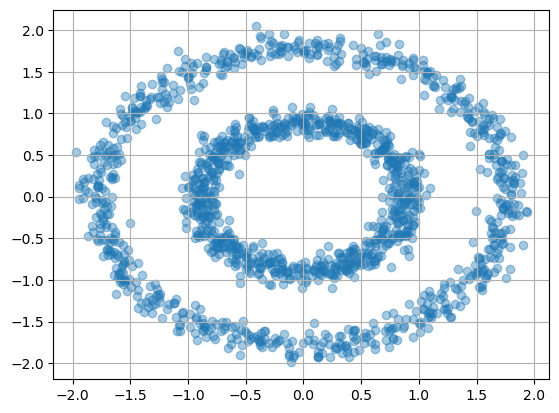

In [21]:
plt.scatter(n_cir[:, 0], n_cir[:, -1], alpha=.4)
plt.grid()

In [22]:
from sklearn.cluster import KMeans

In [23]:
k_means = KMeans(n_clusters=2).fit(n_cir)

In [24]:
k_means.labels_

array([1, 0, 1, ..., 1, 0, 1], dtype=int32)

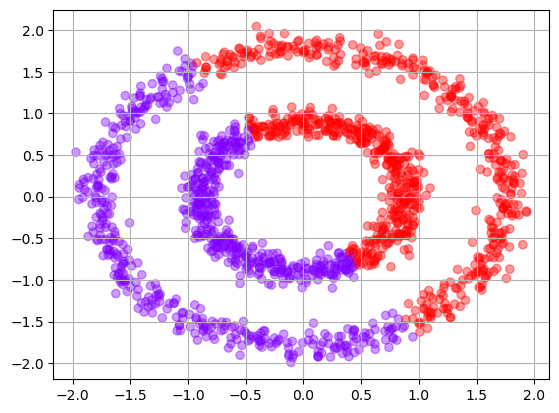

In [27]:
plt.scatter(
    n_cir[:, 0],
    n_cir[:, -1],
    c=k_means.labels_,
    marker="o",
    cmap="rainbow",
    alpha=.4
)
plt.grid()

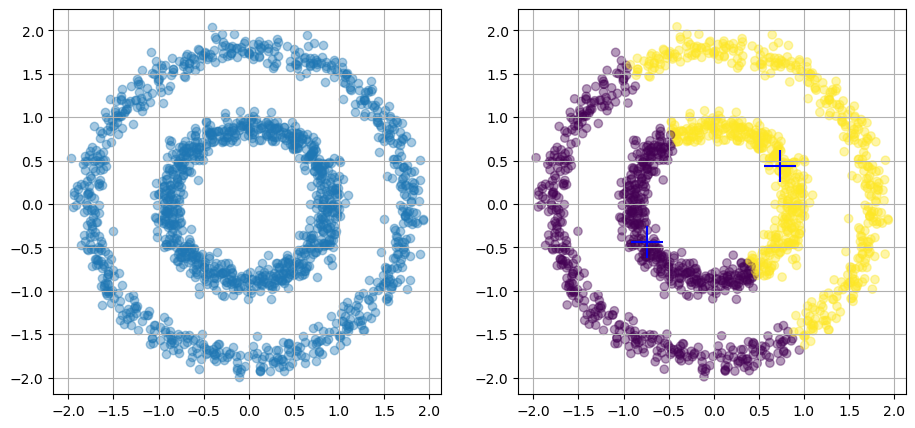

In [29]:
f, axes = plt.subplots(1, 2, figsize=(11, 5))
axes[0].scatter(n_cir[:, 0], n_cir[:, -1], alpha=.4)
axes[1].scatter(n_cir[:, 0], n_cir[:, -1], c=k_means.labels_, alpha=.4)
axes[1].scatter(
    k_means.cluster_centers_[:, 0],
    k_means.cluster_centers_[:, -1],
    marker="+",
    s=500,
    c='b'
)
axes[0].grid(True)
axes[1].grid(True)
plt.show()

In [30]:
dbscan = DBSCAN(eps=.3, min_samples=5)
dbscan.fit(n_cir)

DBSCAN(eps=0.3)

In [31]:
dblabels = dbscan.labels_
dblabels

array([0, 0, 0, ..., 1, 0, 1])

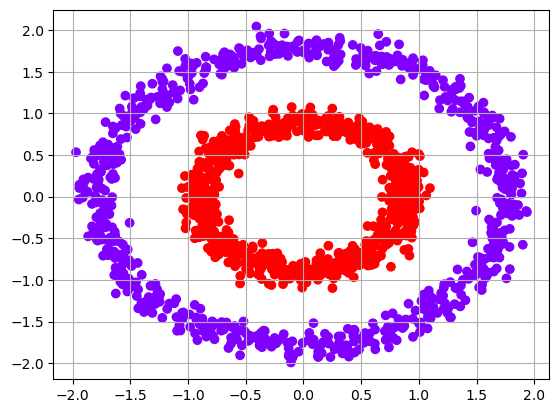

In [32]:
plt.scatter(n_cir[:, 0], n_cir[:, -1], c=dblabels, marker="o", cmap="rainbow")
plt.grid()

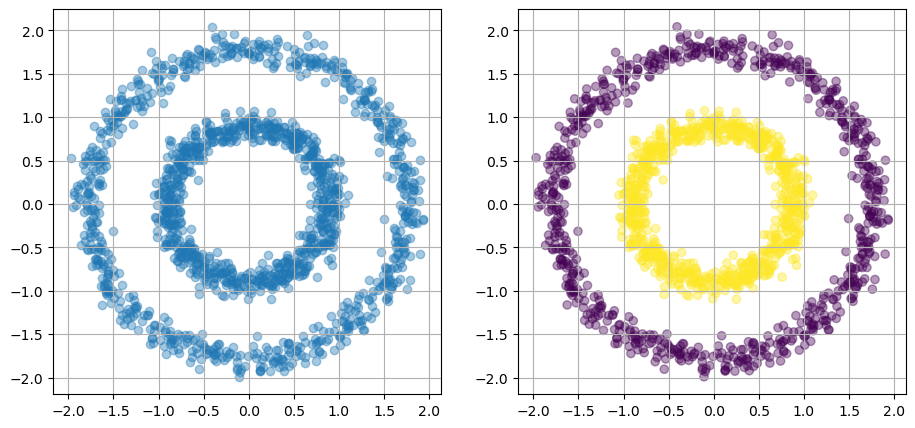

In [34]:
f, axes = plt.subplots(1, 2, figsize=(11, 5))
axes[0].scatter(n_cir[:, 0], n_cir[:, -1], alpha=.4)
axes[1].scatter(n_cir[:, 0], n_cir[:, -1], c=dbscan.labels_, alpha=.4)
axes[0].grid(True)
axes[1].grid(True)
plt.show()

In [35]:
from fcmeans import FCM

In [36]:
fc_means = FCM(n_clusters=2)
fc_means.fit(n_cir)

In [37]:
fcm_labels = fc_means.predict(n_cir)

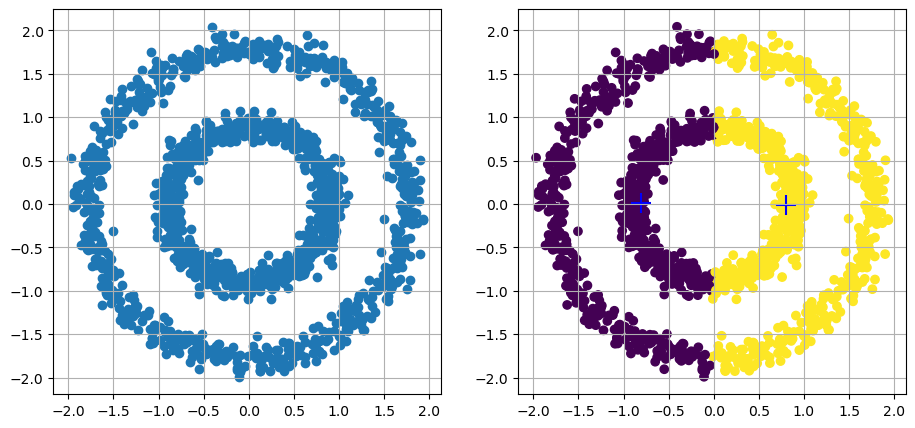

In [38]:
f, axes = plt.subplots(1, 2, figsize=(11, 5))
axes[0].scatter(n_cir[:, 0], n_cir[:, -1])
axes[1].scatter(n_cir[:, 0], n_cir[:, -1], c=fcm_labels)
axes[1].scatter(
    fc_means.centers[:, 0],
    fc_means.centers[:, -1],
    marker="+",
    s=200,
    c='b'
)
axes[0].grid(True)
axes[1].grid(True)
plt.show()

In [39]:
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

In [40]:
noisy_moons

(array([[-0.47186304,  0.84968061],
        [-1.00006441,  0.15731754],
        [-0.94730804,  0.36542917],
        ...,
        [ 1.91193561,  0.0488944 ],
        [-0.07608467,  0.44073187],
        [ 0.0312033 ,  0.22975482]]),
 array([0, 0, 0, ..., 1, 1, 1]))

In [41]:
n_moon = noisy_moons[0]

In [42]:
n_moon = StandardScaler().fit_transform(n_moon)

In [43]:
n_moon

array([[-1.1180194 ,  1.20438968],
       [-1.72703968, -0.18679281],
       [-1.66621119,  0.23137111],
       ...,
       [ 1.63051898, -0.40465015],
       [-0.66168385,  0.38267871],
       [-0.53797999, -0.04124276]])

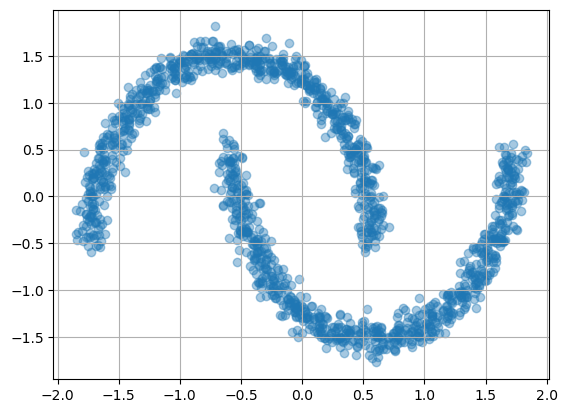

In [44]:
plt.scatter(n_moon[:, 0], n_moon[:, -1], alpha=.4)
plt.grid()

In [46]:
dbscan = DBSCAN(eps=.3)
dbscan.fit(n_moon)

DBSCAN(eps=0.3)

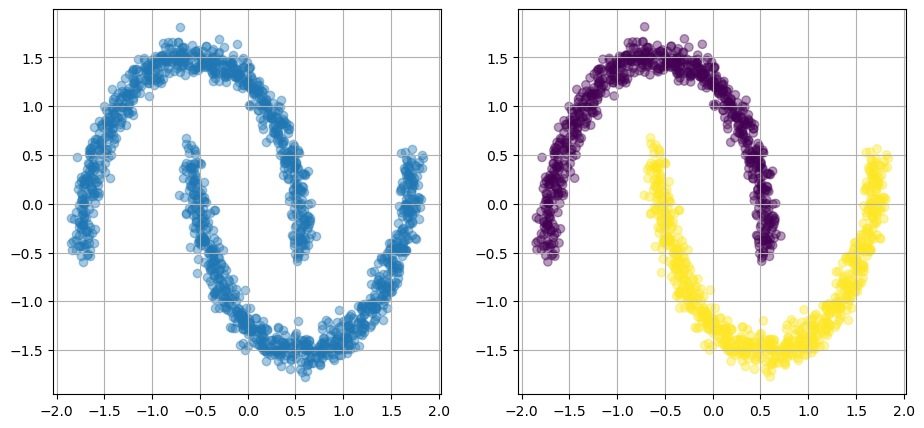

In [47]:
f, axes = plt.subplots(1, 2, figsize=(11, 5))
axes[0].scatter(n_moon[:, 0], n_moon[:, -1], alpha=.4)
axes[1].scatter(n_moon[:, 0], n_moon[:, -1], c=dbscan.labels_, alpha=.4)
axes[0].grid(True)
axes[1].grid(True)
plt.show()

In [48]:
k_means = KMeans(n_clusters=2).fit(n_moon)

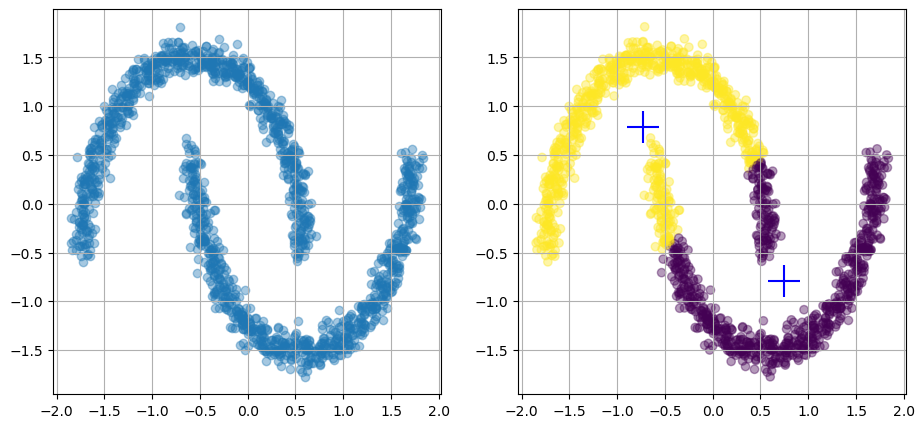

In [49]:
f, axes = plt.subplots(1, 2, figsize=(11, 5))
axes[0].scatter(n_moon[:, 0], n_moon[:, -1], alpha=.4)
axes[1].scatter(n_moon[:, 0], n_moon[:, -1], c=k_means.labels_, alpha=.4)
axes[1].scatter(
    k_means.cluster_centers_[:, 0],
    k_means.cluster_centers_[:, -1],
    marker="+",
    s=500,
    c='b'
)
axes[0].grid(True)
axes[1].grid(True)
plt.show()

In [50]:
fc_means = FCM(n_clusters=2)
fc_means.fit(n_moon)

In [51]:
fcm_labels = fc_means.predict(n_moon)

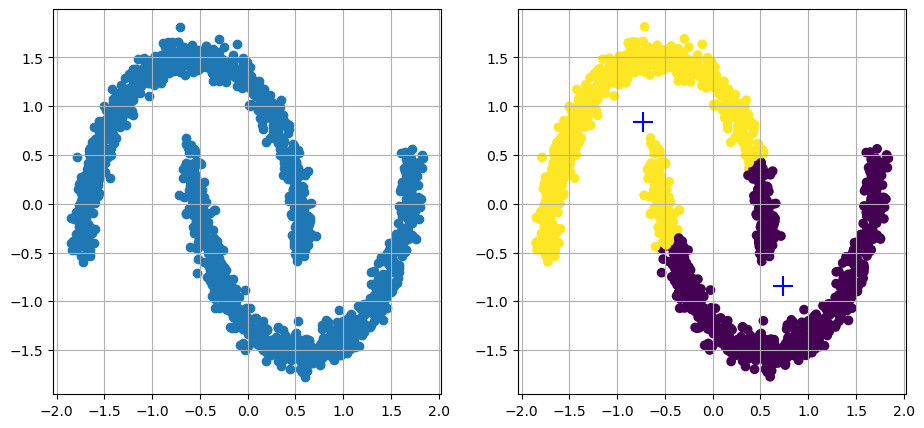

In [52]:
f, axes = plt.subplots(1, 2, figsize=(11, 5))
axes[0].scatter(n_moon[:, 0], n_moon[:, -1])
axes[1].scatter(n_moon[:, 0], n_moon[:, -1], c=fcm_labels)
axes[1].scatter(
    fc_means.centers[:, 0],
    fc_means.centers[:, -1],
    marker="+",
    s=200,
    c='b'
)
axes[0].grid(True)
axes[1].grid(True)
plt.show()

In [53]:
np.random.seed(0)
random_state = 3
blobs = datasets.make_blobs(
    n_samples=n_samples,
    cluster_std=[.5, 1.5, 1.],
    random_state=random_state
)
bl = blobs[0]
bl = StandardScaler().fit_transform(bl)

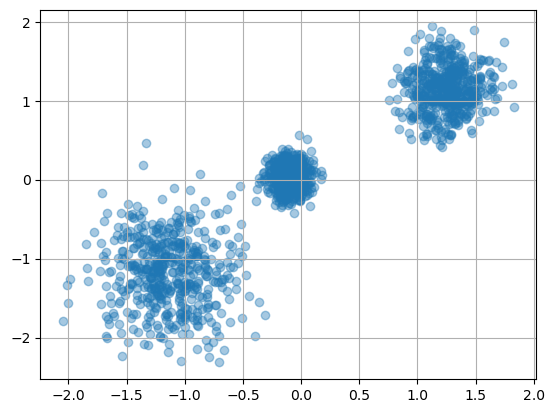

In [54]:
plt.scatter(bl[:, 0], bl[:, -1], alpha=.4)
plt.grid()

In [55]:
dbscan = DBSCAN(eps=.3)
dbscan.fit(bl)

DBSCAN(eps=0.3)

In [57]:
dbscan.labels_

array([-1,  0,  1, ...,  1,  1,  1])

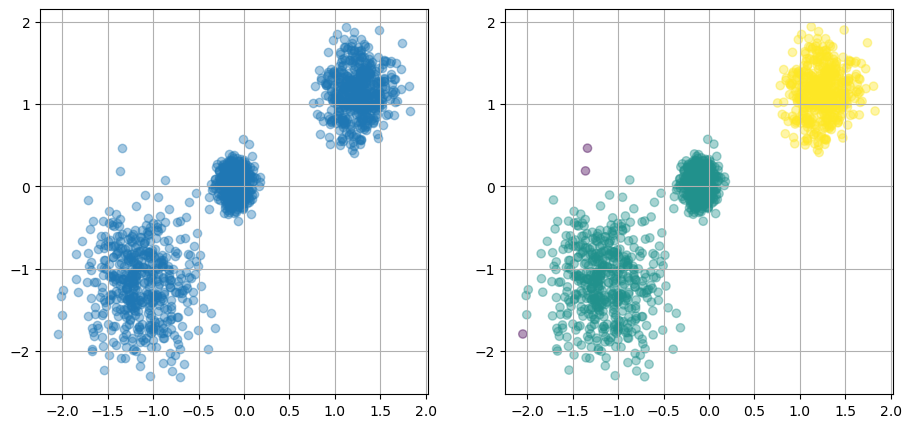

In [58]:
f, axes = plt.subplots(1, 2, figsize=(11, 5))
axes[0].scatter(bl[:, 0], bl[:, -1], alpha=.4)
axes[1].scatter(bl[:, 0], bl[:, -1], c=dbscan.labels_, alpha=.4)
axes[0].grid(True)
axes[1].grid(True)
plt.show()

In [63]:
fc_means = FCM(n_clusters=3)
fc_means.fit(bl)
fcm_labels = fc_means.predict(bl)

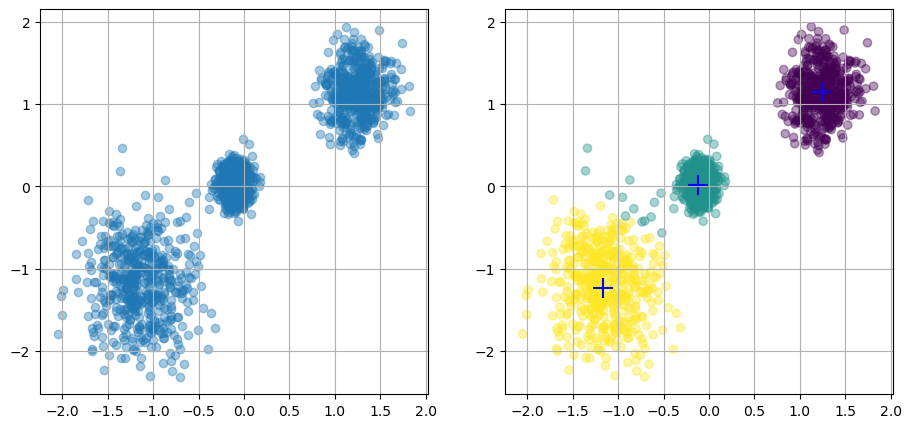

In [64]:
f, axes = plt.subplots(1, 2, figsize=(11, 5))
axes[0].scatter(bl[:, 0], bl[:, 1], alpha=.4)
axes[1].scatter(bl[:, 0], bl[:, 1], c=fcm_labels, alpha=.4)
axes[1].scatter(
    fc_means.centers[:, 0],
    fc_means.centers[:, -1],
    marker="+",
    s=200,
    c='b'
)
axes[0].grid(True)
axes[1].grid(True)
plt.show()

In [65]:
k_means = KMeans(n_clusters=3)
k_means.fit(bl)
fcm_labels = k_means.predict(bl)

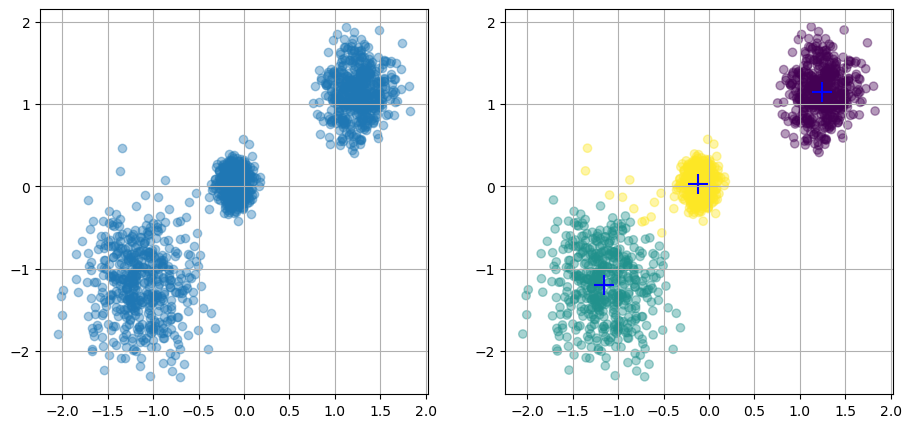

In [68]:
f, axes = plt.subplots(1, 2, figsize=(11, 5))
axes[0].scatter(bl[:, 0], bl[:, 1], alpha=.4)
axes[1].scatter(bl[:, 0], bl[:, 1], c=fcm_labels, alpha=.4)
axes[1].scatter(
    k_means.cluster_centers_[:, 0],
    k_means.cluster_centers_[:, -1],
    marker="+",
    s=200,
    c='b'
)
axes[0].grid(True)
axes[1].grid(True)
plt.show()

In [69]:
from sklearn.cluster import AgglomerativeClustering

In [70]:
agg_clustering_average = AgglomerativeClustering(n_clusters=2, linkage='average')
agg_clustering_complete = AgglomerativeClustering(n_clusters=2, linkage='complete')
agg_clustering_single = AgglomerativeClustering(n_clusters=2, linkage='single')
agg_clustering_ward = AgglomerativeClustering(n_clusters=2, linkage='ward')

In [71]:
agg_clustering_average.fit(n_cir)
agg_clustering_complete.fit(n_cir)
agg_clustering_single.fit(n_cir)
agg_clustering_ward.fit(n_cir)

AgglomerativeClustering()

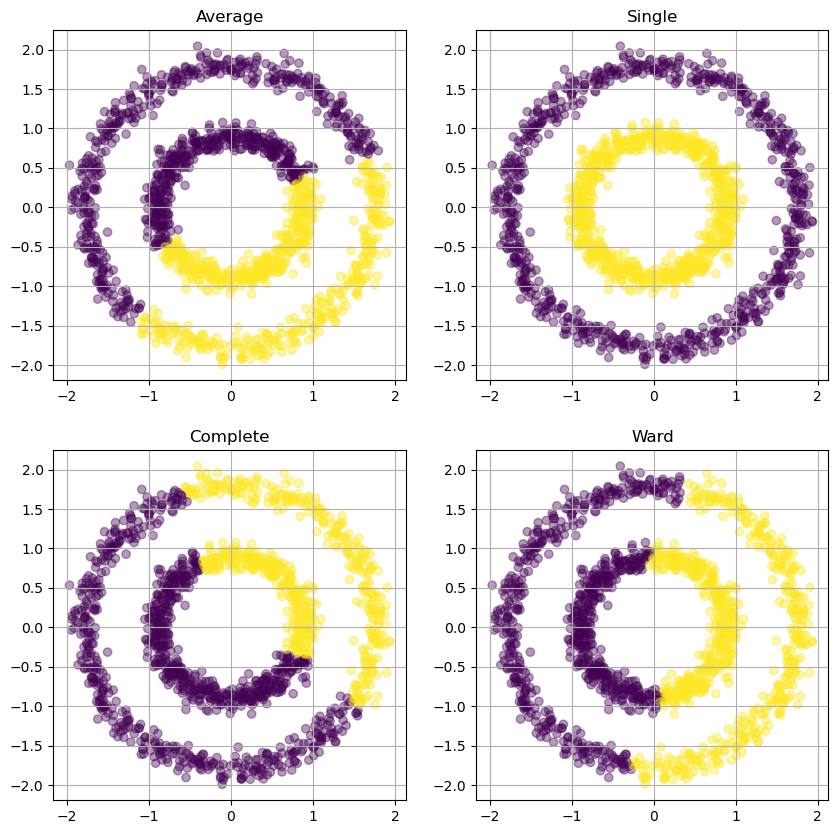

In [73]:
f, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].set_title("Average")
axes[1, 0].set_title("Complete")
axes[0, 1].set_title("Single")
axes[1, 1].set_title("Ward")
axes[0, 0].scatter(
    n_cir[:, 0],
    n_cir[:, -1],
    c=agg_clustering_average.labels_,
    alpha=.4
)
axes[1, 0].scatter(
    n_cir[:, 0],
    n_cir[:, -1],
    c=agg_clustering_complete.labels_,
    alpha=.4
)
axes[0, 1].scatter(
    n_cir[:, 0],
    n_cir[:, -1],
    c=agg_clustering_single.labels_,
    alpha=.4
)
axes[1, 1].scatter(
    n_cir[:, 0],
    n_cir[:, -1],
    c=agg_clustering_ward.labels_,
    alpha=.4
)
axes[0, 0].grid(True)
axes[1, 0].grid(True)
axes[0, 1].grid(True)
axes[1, 1].grid(True)

In [74]:
agg_clustering_average = AgglomerativeClustering(
    n_clusters=2,
    linkage='average'
)
agg_clustering_complete = AgglomerativeClustering(
    n_clusters=2,
    linkage='complete'
)
agg_clustering_single = AgglomerativeClustering(
    n_clusters=2,
    linkage='single'
)
agg_clustering_ward = AgglomerativeClustering(
    n_clusters=2,
    linkage='ward'
)
agg_clustering_average.fit(n_moon)
agg_clustering_complete.fit(n_moon)
agg_clustering_single.fit(n_moon)
agg_clustering_ward.fit(n_moon)

AgglomerativeClustering()

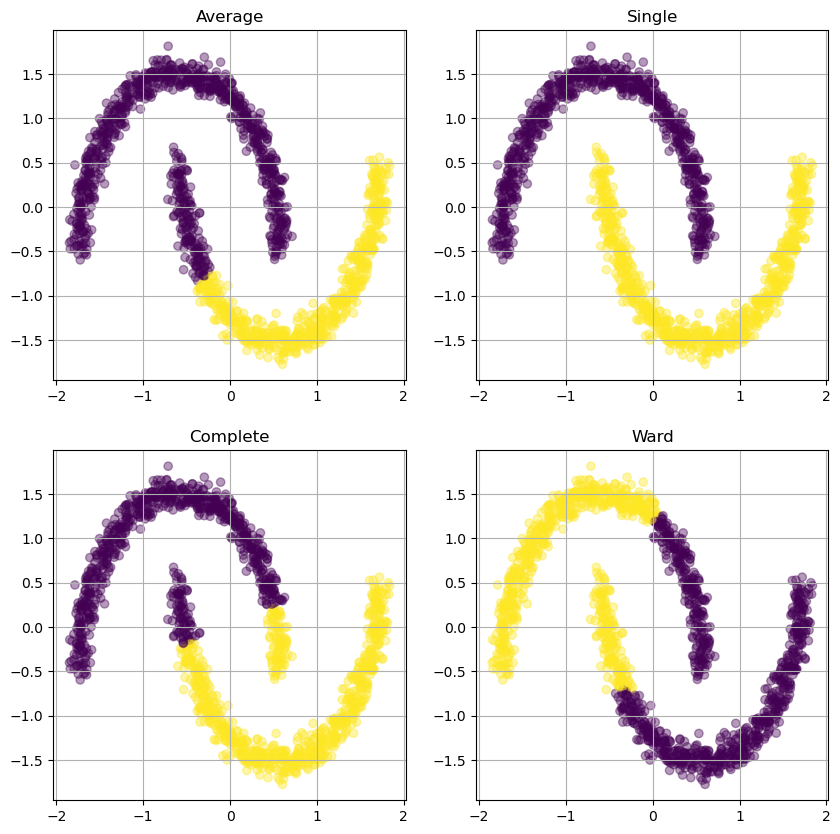

In [75]:
f, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].set_title("Average")
axes[1, 0].set_title("Complete")
axes[0, 1].set_title("Single")
axes[1, 1].set_title("Ward")
axes[0, 0].scatter(
    n_moon[:, 0],
    n_moon[:, -1],
    c=agg_clustering_average.labels_,
    alpha=.4
)
axes[1, 0].scatter(
    n_moon[:, 0],
    n_moon[:, -1],
    c=agg_clustering_complete.labels_,
    alpha=.4
)
axes[0, 1].scatter(
    n_moon[:, 0],
    n_moon[:, -1],
    c=agg_clustering_single.labels_,
    alpha=.4
)
axes[1, 1].scatter(
    n_moon[:, 0],
    n_moon[:, -1],
    c=agg_clustering_ward.labels_,
    alpha=.4
)
axes[0, 0].grid(True)
axes[1, 0].grid(True)
axes[0, 1].grid(True)
axes[1, 1].grid(True)

In [78]:
agg_clustering_average = AgglomerativeClustering(
    n_clusters=3,
    linkage='average'
)
agg_clustering_complete = AgglomerativeClustering(
    n_clusters=3,
    linkage='complete'
)
agg_clustering_single = AgglomerativeClustering(
    n_clusters=3,
    linkage='single'
)
agg_clustering_ward = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward'
)
agg_clustering_average.fit(bl)
agg_clustering_complete.fit(bl)
agg_clustering_single.fit(bl)
agg_clustering_ward.fit(bl)

AgglomerativeClustering(n_clusters=3)

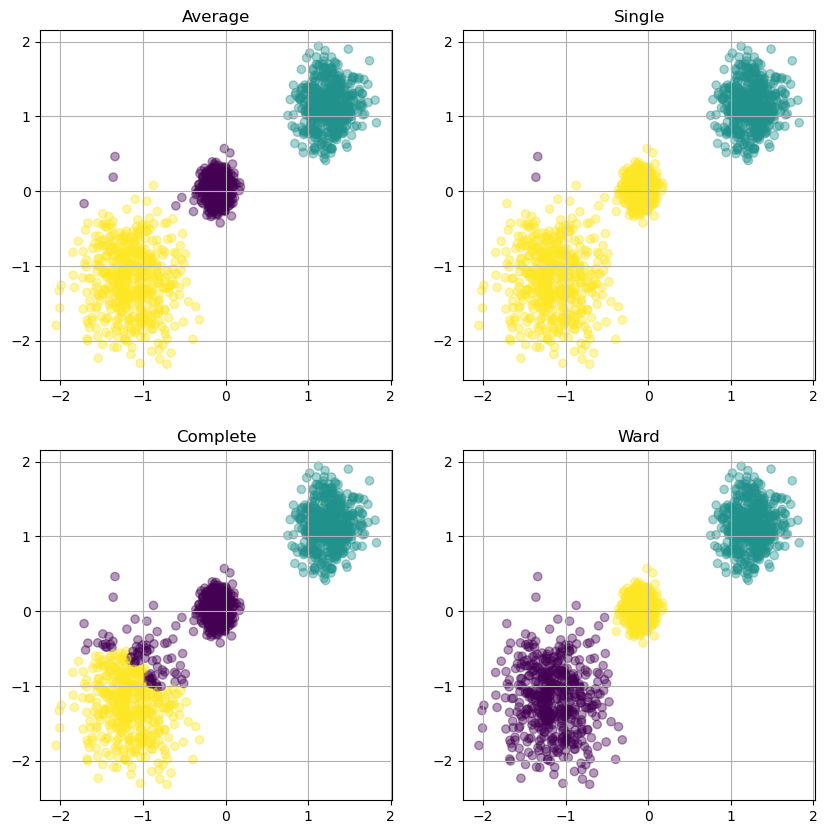

In [79]:
f, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].set_title("Average")
axes[1, 0].set_title("Complete")
axes[0, 1].set_title("Single")
axes[1, 1].set_title("Ward")
axes[0, 0].scatter(
    bl[:, 0],
    bl[:, -1],
    c=agg_clustering_average.labels_,
    alpha=.4
)
axes[1, 0].scatter(
    bl[:, 0],
    bl[:, -1],
    c=agg_clustering_complete.labels_,
    alpha=.4
)
axes[0, 1].scatter(
    bl[:, 0],
    bl[:, -1],
    c=agg_clustering_single.labels_,
    alpha=.4
)
axes[1, 1].scatter(
    bl[:, 0],
    bl[:, -1],
    c=agg_clustering_ward.labels_,
    alpha=.4
)
axes[0, 0].grid(True)
axes[1, 0].grid(True)
axes[0, 1].grid(True)
axes[1, 1].grid(True)

In [81]:
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram

In [80]:
def plot_dendrogram(model, **kwargs):

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for _, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[_] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

In [82]:
iris = load_iris()
X = iris.data

In [83]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

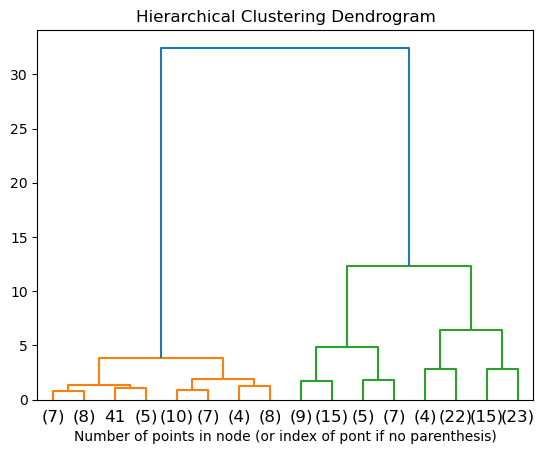

In [84]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of pont if no parenthesis)")
plt.show()